In [1]:
import numpy as np
import pandas as pd

In [10]:
motor = pd.read_csv('motor.csv',sep=",",names = ['symoboling','losses','make','fuel','aspiration',
                                                 'num-of-doors','body','numwheels',
                                                 'enginloc','wheelbase',
                                                'length','width','height','curb','enginetyp',
                                                 'numcylind','engsize','fuelsys','bore','stroke',
                                                 'compreratio','horsepower','peakrpm',
                                                'citympg','highmpg','price'])

In [11]:
motor.head()

,symoboling,losses,make,fuel,aspiration,num-of-doors,body,numwheels,enginloc,wheelbase,...,engsize,fuelsys,bore,stroke,compreratio,horsepower,peakrpm,citympg,highmpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
motor.tail()

,symoboling,losses,make,fuel,aspiration,num-of-doors,body,numwheels,enginloc,wheelbase,...,engsize,fuelsys,bore,stroke,compreratio,horsepower,peakrpm,citympg,highmpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [26]:
onlympg = motor.loc[:,['wheelbase','citympg','highmpg']]

In [27]:
onlympg.head()

,wheelbase,citympg,highmpg
0,88.6,21,27
1,88.6,21,27
2,94.5,19,26
3,99.8,24,30
4,99.4,18,22


In [28]:
onlympg.fillna(0)

,wheelbase,citympg,highmpg
0,88.6,21,27
1,88.6,21,27
2,94.5,19,26
3,99.8,24,30
4,99.4,18,22
5,99.8,19,25
6,105.8,19,25
7,105.8,19,25
8,105.8,17,20
9,99.5,16,22


In [36]:
onlympg['newmileage'] =( onlympg.iloc[:,2] + 
                        onlympg.iloc[:,1])/2

In [37]:
onlympg.head()

,wheelbase,citympg,highmpg,newmileage
0,88.6,21,27,24.0
1,88.6,21,27,24.0
2,94.5,19,26,22.5
3,99.8,24,30,27.0
4,99.4,18,22,20.0


In [38]:
regressiondata = onlympg.loc[:,['wheelbase','newmileage']]

In [39]:
regressiondata.head()

,wheelbase,newmileage
0,88.6,24.0
1,88.6,24.0
2,94.5,22.5
3,99.8,27.0
4,99.4,20.0


In [44]:
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
msk = np.random.rand(len(regressiondata)) < 0.8

In [46]:
train = regressiondata[msk]

In [47]:
test = regressiondata[~msk]

In [48]:
len(train)

175

In [49]:
len(test)

30

In [50]:
len(regressiondata)

205

In [51]:
regr  = linear_model.LinearRegression()

In [68]:
X_train = train.iloc[:,0].values.reshape(-1,1)
Y_train = train.iloc[:,1].values.reshape(-1,1)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

0    24.0
1    24.0
2    22.5
4    20.0
6    22.0
Name: newmileage, dtype: float64

In [67]:
X_test = test.iloc[:,0].values.reshape(-1,1)
Y_test = test.iloc[:,1].values.reshape(-1,1)

In [69]:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
pred_mileage = regr.predict(X_test)

In [71]:
print(regr.coef_)

[[-0.57968371]]


In [72]:
pred_mileage

array([[ 27.31236947],
       [ 27.31236947],
       [ 25.28347648],
       [ 34.96419446],
       [ 30.84844011],
       [ 30.84844011],
       [ 26.0370653 ],
       [ 31.19625034],
       [ 27.89205318],
       [ 21.39959561],
       [ 29.34126246],
       [ 29.34126246],
       [ 30.38469314],
       [ 28.81954712],
       [ 26.96455924],
       [ 22.6169314 ],
       [ 22.6169314 ],
       [ 22.6169314 ],
       [ 30.84844011],
       [ 29.57313594],
       [ 33.2831117 ],
       [ 27.71814807],
       [ 28.81954712],
       [ 29.68907269],
       [ 25.80519182],
       [ 25.80519182],
       [ 25.80519182],
       [ 28.76157875],
       [ 24.70379276],
       [ 21.92131095]])

In [73]:
Y_test

array([[ 27. ],
       [ 22. ],
       [ 27. ],
       [ 34.5],
       [ 40. ],
       [ 32. ],
       [ 15. ],
       [ 30.5],
       [ 29. ],
       [ 23.5],
       [ 28.5],
       [ 26.5],
       [ 47.5],
       [ 30.5],
       [ 19.5],
       [ 30.5],
       [ 30.5],
       [ 21.5],
       [ 39. ],
       [ 21.5],
       [ 21. ],
       [ 24.5],
       [ 30.5],
       [ 29.5],
       [ 31.5],
       [ 29.5],
       [ 29.5],
       [ 30.5],
       [ 19.5],
       [ 20.5]])

In [74]:
print(mean_squared_error(Y_test, pred_mileage))

37.2619926568


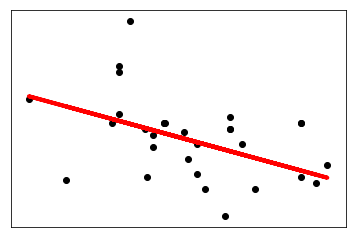

In [77]:
plt.plot(X_test, pred_mileage, color='red', linewidth = 4)
plt.xticks(())
plt.yticks(())
plt.scatter(X_test, Y_test, color = 'black')
plt.show()